## 1. Bernoulli Neuron: Fisher information and estimator

Assume a Bernoulli neuron with arbitrary tuning curve $f(s)$, i.e.
$$p(r| f(s)) = f(s)^r(1- f(s))^{1-r}, \qquad r \in \{0; 1\}$$

*Note: $r$ is discrete and $s$ is continuous.*

**(a)** Compute the Fisher information $J_s$. *(2 points)*


Fischer information $J_s$ is defined as:

$$
\begin{align*}
J_s &= - \mathbb{E}_r \left[  \left(\frac{\partial^2}{\partial s^2} \log p(r | f(s)) \right)\mid s \right] \\
&= - \mathbb{E}_r \left[ \frac{\partial^2}{\partial s^2} \log \left\{f(s)^r(1- f(s))^{1-r} \right\}  \mid s \right] \\
&= - \mathbb{E}_r \left[ \frac{\partial^2}{\partial s^2} \left\{ r \log{f(s)} + (1 - r)\log(1 - f(s))  \right\}  \mid s \right] \\
&= - \mathbb{E}_r \left[ \frac{\partial}{\partial s} \left\{\frac{r f'(s)}{f(s)} - \frac{(1 - r) f'(s)}{1 - f(s)}  \right\}  \mid s \right] \\
&= - \mathbb{E}_r \left[ -\frac{r {f'(s)}^{2}}{{f(s)}^{2}} + \frac{r f''(s)}{f(s)} - \frac{(1 - r) f'(s)^2}{(1 - f(s))^2} - \frac{(1 - r) f''(s)}{1 - f(s)} \mid s \right] \\
&=  \frac{{f'(s)}^{2}}{f(s)} - f''(s) + \frac{f'(s)^2}{1 - f(s)} + f''(s)  \\
\Rightarrow J_s &= \frac{{f'(s)}^{2}}{f(s)(1 - f(s))}
\end{align*}
$$

**(b)** Assume $f(s) = \frac{1}{1+s^2}$. Plot the Fisher information on the interval $s\in[-5, 5]$. Additionally, plot the Fisher information for a Poisson neuron with the same tuning curve using the formula from the lecture. *(2 points)*

Since $f(s) = \frac{1}{1+s^2} \Rightarrow f'(s) = -\frac{2s}{(1+s^2)^2}$, thus <break>

Fischer information for Bernoulli neuron:
$$J^{Bernoulli}_{s} = \frac{{f'(s)}^{2}}{f(s)(1 - f(s))} = \frac{4}{(1+s^2)^2}$$

Similarly, Fischer information for Poisson neuron:
$$J^{Poisson}_{s} = \frac{{f'(s)}^{2}}{f(s)} = \frac{4s^2}{(1+s^2)^3}$$

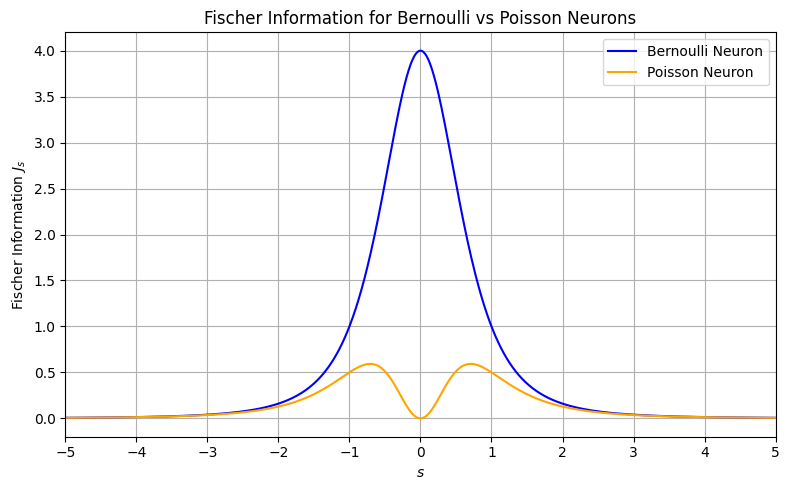

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tuning curve and its derivative
def f(s):
    return 1 / (1 + (s**2))

def f_prime(s):
    return -(2 * s) / ((1 + s**2)**2)

# Define Fisher Information for Bernoulli and Poisson neurons
def J_bernoulli(s):
    return (f_prime(s)**2) / (f(s) * (1 - f(s)))

def J_poisson(s):
    return (f_prime(s)**2) / f(s)

# Create a range of s values
s_vals = np.linspace(-5, 5, 1000)

# Compute Fisher information
Jb = J_bernoulli(s_vals)
Jp = J_poisson(s_vals)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(s_vals, Jb, label='Bernoulli Neuron', color='blue')
plt.plot(s_vals, Jp, label='Poisson Neuron', color='orange')
plt.xlim(-5, 5)
plt.xticks(np.arange(-5, 6, 1))
plt.xlabel('$s$')
plt.ylabel('Fischer Information $J_s$')
plt.title('Fischer Information for Bernoulli vs Poisson Neurons')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**(c)** Given an estimator
$\hat s(r) = \begin{cases} 1 & if\qquad r=0\\ 0 &if\qquad r=1\end{cases}$.\
Compute variance $\sigma^2(s)$, bias $b(s)$, and mean squared error $MS(s)$ of this estimator. Don't use the relationship $MS(s) = b^2(s) + \sigma^2(s)$, but instead compute them independently. *(2 points)*

*Confirm for yourself with an automatized tool like wolphramalpha that their relationship is correct.*

For given Bernoulli neuron, 

$$p(r = 0 \mid s) = 1 - f(s) \quad \text{and} \quad p(r = 1\mid s) = f(s)$$

We first compute $\mathbb{E}_r [\hat{s}(r)]$ which is the expectation of our estimator:

$$\mathbb{E}_r [\hat{s}(r)] = \sum_{r={0,1}} p(r \mid s) \hat{s}(r) = 1 - f(s) = \frac{s^2}{1 + s^2}$$


We can now compute the variance $\sigma^2(s)$: 
$$\begin{align*}
\sigma^2(s) &= \mathbb{E}_r \left[ (\hat{s} - \mathbb{E}[\hat{s}])^2 \mid s \right] \\
&= \sum_{r={0,1}} p(r \mid s) (\hat{s} - \mathbb{E}[\hat{s}])^2 \\
&= p(r = 0\mid s) (1 - \mathbb{E}[\hat{s}])^2 + p(r = 1\mid s) (0 - \mathbb{E}[\hat{s}])^2 \\
&= (1 - f(s)) (1 - (1 - f(s)))^2 + f(s)(0 - (1 - f(s)))^2 \\
\Rightarrow \sigma^2(s) &= f(s)(1 - f(s))\\
&= \frac{s^2}{(1+s^2)^2}\\
\end{align*}$$

And the bias $b(s)$:
$$ \begin{align*} 
b(s) &= \mathbb{E}_r [\hat{s}(r) \mid s] - s \\
&= (1 - f(s)) - s \\
&= \frac{s^2 - s - s^3}{1 + s^2} 
\end{align*}$$ 

The mean squared error:

$$\begin{align*}
MS(s) &= \mathbb{E}[(\hat{s}(r) - s)^2] \\
&= (\hat{s}(0) - s)^2 \cdot p(r=0|s) + (\hat{s}(1) - s)^2 \cdot p(r=1|s) \\
&= (1 - s)^2 (1 - f(s)) + s^2 f(s) \\
&= \frac{s^2}{1 + s^2} \left( (1 - s)^2 + 1 \right) \\
&= \frac{s^2 \left( (1 - s)^2 + 1 \right)}{1 + s^2}
\end{align*}$$
    

**(d)** Assume $s\sim\mathcal{U}([0,1])$. Compute the ideal observer $\hat s_{MS}(r)$. *(2 points)*

*Hint: Compute $p(r=0)$ and $p(r=1)$ with law of total probability. Then use Bayes' theorem to compute $p(s|r)$. Useful integrals:*
\begin{split}
\int \frac1{1+s^2} ds &= \tan^{-1}(s) + c, \qquad c\in\mathbb{R}\\
\int \frac{s}{1+s^2} ds &= \frac12 \ln(1+s^2) + c, \qquad c\in\mathbb{R} \\
\int \frac{s^2}{1+s^2} ds &= s - \tan^{-1}(s) + c, \qquad c\in\mathbb{R} \\
\int \frac{s^3}{1+s^2} ds &= \frac{s^2 - \ln(1+s^2)}{2} + c, \qquad c\in\mathbb{R}
\end{split}

We can compute $\hat s_{MS}(r)$ using Bayes' theorem: $$\hat{s}_{MS}(r) = \mathbb{E}_s[s \mid r] = \int s \cdot p(s \mid r) ds = \int s \cdot \frac{p(r\mid s) p(s)}{p(r)} ds$$

We already know,
$$p(r = 0 \mid s) = 1 - f(s) = \frac{s^2}{1 + s^2} \quad \text{and} \quad p(r = 1\mid s) = f(s) = \frac{1}{1 + s^2}$$

Thus, we can compute the marginals:

$$ p(r = 0) = \int^{1}_{0} p(r=0 \mid s) ds = \int^{1}_{0} \frac{s^2}{1 + s^2} ds = [s - \tan^{-1}(s)]^{1}_{0} = 1 - \frac{\pi}{4}$$
$$ p(r = 1) = \int^{1}_{0} p(r=1 \mid s) ds = \int^{1}_{0} \frac{1}{1 + s^2} ds = [\tan^{-1}(s)]^{1}_{0} = \frac{\pi}{4}$$

Since $s\sim\mathcal{U}([0,1])$, the prior $p(s) = 1$.

Now, we can compute $\hat s_{MS}(r)$:
$$ \begin{align*} 
\hat{s}_{MS}(r=0) &= \int^1_0 s \cdot \frac{p(r = 0 \mid s) p(s)}{p(r = 0)} ds = \frac{1}{(1 - \frac{\pi}{4})} \int^1_0 \frac{s^3}{1 + s^2}ds \\
&= \frac{1}{(1 - \frac{\pi}{4})} \left[\frac{s^2 - \ln(1+s^2)}{2}\right]^1_0 \\
&= \frac{2(1 - \ln2)}{4 - \pi}
\end{align*}$$

$$ \begin{align*} 
\hat{s}_{MS}(r=1) &= \int^1_0 s \cdot \frac{p(r = 1 \mid s) p(s)}{p(r = 1)} ds = \frac{1}{\frac{\pi}{4}} \int^1_0 \frac{s}{1 + s^2}ds \\
&= \frac{4}{\pi} \left[\frac{\ln(1+s^2)}{2}\right]^1_0 \\
&= \frac{2\ln2}{\pi}
\end{align*}$$

Thus,

$$\boxed{\hat s_{MS}(r) = \begin{cases} \frac{2(1 - \ln2)}{4 - \pi} & \quad r = 0 \\ \frac{2\ln2}{\pi} & \quad r = 1\end{cases}}$$


**(e*)** Contextualize the previous exercises with Cramer-Rao bound. *(2 points)*

Since our estimator $\hat{s}$ is biased, the generalised Cramer-Rao bound states that variance of the estimator is lower bounded:

$$ \mathbb{Var}(\hat{s}) \geq \frac{(1 + b'(s))^2}{J(s)} $$

Since we had computed the bias $b(s) = 1 - f(s) - s$, we can compute its derivative $b'(s) = -f'(s) - 1$. Thus the bound becomes:

$$ \begin{align*} 
\mathbb{Var}(\hat{s}) &\geq \frac{(1 + b'(s))^2}{J(s)} \\
&\geq \frac{f'(s)^2}{\frac{f'(s)^2}{f(s)(1 - f(s))}} \\
&\geq f(s)(1 - f(s))
\end{align*}$$

And we had already computed the variance of the estimator as $\sigma^2(s) = f(s)(1 - f(s))$, which means as per the CRB, this is the least variance possible for the estimator and the estimator is currently optimal.


## 2: Minimum Discrimination Error (MDE)

Given two stimuli $s_1$ and $s_2$ with probabilities $\lambda$ and $1-\lambda$, the response function is given as

$$p(r|s) = \begin{cases}
\tfrac12 &for & s=0 &and &r\in[-1,1]\\
\tfrac1{2x} &for &s=1 &and &r\in[-x, x]\\
0 &else
\end{cases}$$

**(a)** Draw diagrams for each possible case and highlight the MDE. Additionally, write down the decision for the Maximal a posteriori estimator $\hat{s}_{MAP}(r)$. *(2 points)*\
*Hint: Differentiate the cases by $\lambda$ and $x$. (there are 4 possibilities)*

The MAP estimator selects the response with the higher posterior: $$\hat{s}_{MAP}(r) =\max_{r} \; p(s \mid r) = \arg\max_{s \in \{0,1\}} \; p(r \mid s) \cdot p(s)$$

Thus we compute: $$ \hat{s}_{MAP}(r) = \argmax \{\lambda p(r \mid s = 0), (1 - \lambda) p(r \mid s = 1) \}$$

There are different cases based on $x$ and $r$:
1. $x < 1$:<br>
    - $r \in [-x, x] \Rightarrow \hat{s}_{MAP}(r) = \arg\max\{\frac{\lambda}{2}, \frac{1-\lambda}{2x}\} = \begin{cases} 0  & \text{if } \lambda \geq \frac{1}{1+x} \\ 1 & \text{if } \lambda < \frac{1}{1+x} \end{cases} $
    - $r \in [-1, -x)\cup(x,1] \Rightarrow \hat{s}_{MAP}(r) = \arg\max{\{\frac{\lambda}{2}, 0\}} = 0$
    - $r \in [-\infty, -1)\cup(1,\infty] \Rightarrow \hat{s}_{MAP}(r) = \arg\max{\{0, 0\}} = \emptyset$ (undefined)

2. $x \geq 1$:<br>
    - $r \in [-1, 1] \Rightarrow \hat{s}_{MAP}(r) = \arg\max\{\frac{\lambda}{2}, \frac{1-\lambda}{2x}\} = \begin{cases} 0  & \text{if } \lambda \geq \frac{1}{1+x} \\ 1 & \text{if } \lambda < \frac{1}{1+x} \end{cases} $
    - $r \in [-x, -1)\cup(1,x] \Rightarrow \hat{s}_{MAP}(r) = \arg\max{\{0, \frac{1-\lambda}{2x}\}} = 1$
    - $r \in [-\infty, -x)\cup(x,\infty] \Rightarrow \hat{s}_{MAP}(r) = \arg\max{\{0, 0\}} = \emptyset$ (undefined)

Thus we can summarise the decision rule as:
$$

\hat{s}_{MAP}(r) = \begin{cases}
0 & \text{if } r \in [-1,1] \setminus [-x,x] \\
1 & \text{if } r \in [-x,x] \setminus [-1,1] \\
0 & \text{if } r \in [-1,1] \cap [-x,x] \text{ and } \lambda > \frac{1}{1+x} \\
1 & \text{if } r \in [-1,1] \cap [-x,x] \text{ and } \lambda < \frac{1}{1+x}
\end{cases}

$$

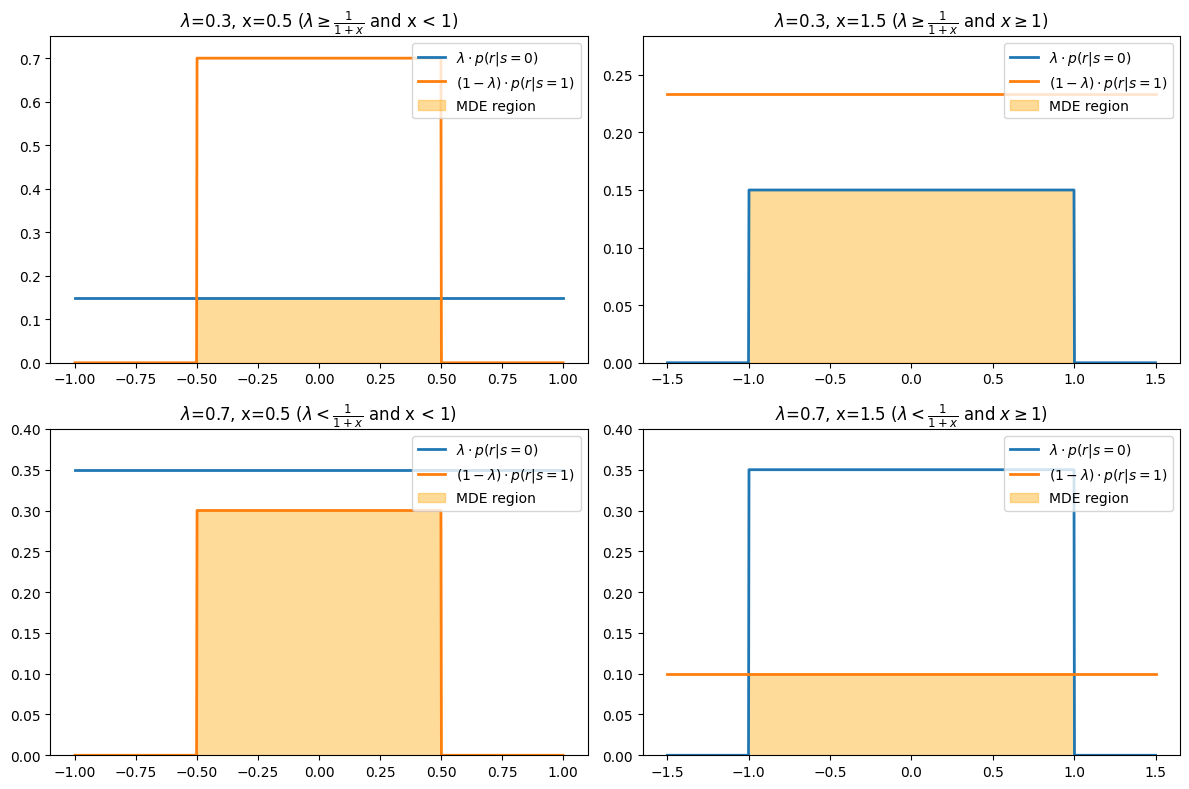

In [2]:
cases = [r"$\lambda \geq \frac{1}{1+x}$ and x < 1", r"$\lambda \geq \frac{1}{1+x}$ and $x \geq 1$", r"$\lambda < \frac{1}{1+x}$ and x < 1", r"$\lambda < \frac{1}{1+x}$ and $x \geq 1$"]

def plot_mde_region(lambda_, x, ax):
    # r-axis range based on max support of both distributions
    r_min = -max(1, x)
    r_max = max(1, x)
    r = np.linspace(r_min, r_max, 1000)

    # p(r|s=0): uniform on [-1, 1]
    p0 = np.where((r >= -1) & (r <= 1), 0.5, 0)
    
    # p(r|s=1): uniform on [-x, x]
    p1 = np.where((r >= -x) & (r <= x), 1/(2*x), 0)

    # weighted posteriors
    post0 = lambda_ * p0
    post1 = (1 - lambda_) * p1

    # MDE is the area under min(post0, post1)
    mde = np.minimum(post0, post1)

    ax.plot(r, post0, label=r"$\lambda \cdot p(r|s=0)$", lw=2)
    ax.plot(r, post1, label=r"$(1-\lambda) \cdot p(r|s=1)$", lw=2)
    ax.fill_between(r, 0, mde, color='orange', alpha=0.4, label="MDE region")

    ax.set_title(fr"$\lambda$={lambda_}, x={x} ({cases.pop(0)})")
    ax.set_ylim(0, max(post0.max(), post1.max()) + 0.05)
    ax.legend(loc='upper right')

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
params = [(0.3, 0.5), (0.3, 1.5), (0.7, 0.5), (0.7, 1.5)]

for ax, (lam, x) in zip(axs.flat, params):
    plot_mde_region(lam, x, ax)

plt.tight_layout()
plt.show()

**(b)** Compute the MDE for each case analytically. *(1 point)*

$$\text{MDE} = \int^{\infty}_{-\infty} min\{\lambda p(r \mid s = 0), (1 - \lambda)p(r \mid s = 1)\} dr$$

1. For $x < 1$, the common area would be in $r \in [-x, x]$, thus the MDE integral simplifies to:
$$ \int^{x}_{-x} min\{\frac{\lambda}{2}, \frac{1-\lambda}{2x}\} dr = \begin{cases} \int^{x}_{-x} \frac{1-\lambda}{2x} dr = 1 - \lambda & \text{if } \lambda \geq \frac{1}{1+x} \\ \\ \int^{x}_{-x} \frac{\lambda}{2} dr = x \lambda & \text{if } \lambda < \frac{1}{1+x} \end{cases} $$

2. For $x \geq 1$, the common area would be in $r \in [-1, 1]$, thus the MDE integral simplifies to:
$$ \int^{1}_{-1} min\{\frac{\lambda}{2}, \frac{1-\lambda}{2x}\} dr = \begin{cases} \int^{1}_{-1} \frac{1-\lambda}{2x} dr = \frac{1 - \lambda}{x} & \text{if } \lambda \geq \frac{1}{1+x} \\ \\ \int^{1}_{-1} \frac{\lambda}{2} dr = \lambda & \text{if } \lambda < \frac{1}{1+x} \end{cases} $$

Therefore,

$$\text{MDE} = \begin{cases}
1 - \lambda & \text{if } x < 1 \cap \lambda \geq \frac{1}{1+x} \\
x \lambda & \text{if } x < 1 \cap \lambda < \frac{1}{1+x} \\
\frac{1 - \lambda}{x} & \text{if } x \geq 1 \cap \lambda \geq \frac{1}{1+x} \\
\lambda & \text{if } x \geq 1 \cap \lambda < \frac{1}{1+x} \\
\end{cases}
$$

**(c)** Confirm your results by simulation for multiple sets of parameters $\lambda$ and $x$.
Choose your selection of parameters such that they cover all cases from (a). *(2 points)*
1. Generate stimuli (sufficient amount)
2. Generate responses
3. Apply estimator (write a function of $\hat{s}_{MAP}(r)$ from (a))
4. Compute MDE
5. Compare to analytical MDE

In [ ]:

# Set a random seed for reproducibility
np.random.seed(42)

#  Define MAP estimator based on r, x, lambda (Vectorized version)
def map_estimator_vec(r, x, lamb):
    threshold = 1 / (1 + x)
    decisions = np.zeros_like(r, dtype=int)
    in_r0 = (np.abs(r) <= 1)
    in_r1 = (np.abs(r) <= x)

    # r in both
    in_both = in_r0 & in_r1
    decisions[in_both] = 0 if lamb > threshold else 1

    # r only in r0
    only_r0 = in_r0 & ~in_r1
    decisions[only_r0] = 0

    # r only in r1
    only_r1 = in_r1 & ~in_r0
    decisions[only_r1] = 1

    return decisions

# Simulate experiment
def simulate_MDE(x, lamb, N=100000):
    # Step 1: generate true stimuli
    stimuli = np.random.choice([0, 1], size=N, p=[lamb, 1 - lamb])

    # Step 2: generate responses
    responses = np.zeros(N)
    mask0 = stimuli == 0
    mask1 = ~mask0
    responses[mask0] = np.random.uniform(-1, 1, size=np.sum(mask0))
    responses[mask1] = np.random.uniform(-x, x, size=np.sum(mask1))

    # Step 3: apply MAP estimator
    predictions = map_estimator_vec(responses, x, lamb)

    # Step 4: compute MDE
    MDE_sim = np.mean(predictions != stimuli)

    # Step 5: analytical MDE
    threshold = 1 / (1 + x)
    if x < 1 and lamb >= threshold:
        MDE_analytical = 1 - lamb
    elif x < 1 and lamb < threshold:
        MDE_analytical = x * lamb
    elif x >= 1 and lamb >= threshold:
        MDE_analytical = (1 - lamb) / x
    else:  # x >= 1 and lamb < threshold
        MDE_analytical = lamb

    return MDE_sim, MDE_analytical

# Run simulations for all 4 cases
param_sets = [
    {"x": 0.5, "lambda": 0.3},  # Case 1: x < 1, lambda > 1/(1+x)
    {"x": 0.5, "lambda": 0.7},  # Case 2: x < 1, lambda < 1/(1+x)
    {"x": 1.5, "lambda": 0.3},  # Case 3: x > 1, lambda > 1/(1+x)
    {"x": 1.5, "lambda": 0.7},  # Case 4: x > 1, lambda < 1/(1+x)
]

for i, params in enumerate(param_sets):
    sim, analytic = simulate_MDE(params["x"], params["lambda"])
    print(f"Case {i+1} | x = {params['x']}, lambda = {params['lambda']:.2f}")
    print(f"Simulated MDE:  {sim:.4f}")
    print(f"Analytical MDE: {analytic:.4f}")
    print("-" * 40)


Case 1 | x = 0.5, lambda = 0.30
Simulated MDE:  0.1501
Analytical MDE: 0.1500
----------------------------------------
Case 2 | x = 0.5, lambda = 0.70
Simulated MDE:  0.2999
Analytical MDE: 0.3000
----------------------------------------
Case 3 | x = 1.5, lambda = 0.30
Simulated MDE:  0.2987
Analytical MDE: 0.3000
----------------------------------------
Case 4 | x = 1.5, lambda = 0.70
Simulated MDE:  0.2010
Analytical MDE: 0.2000
----------------------------------------
